In [1]:
import sys
sys.path.append('./../')

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import helpertests as tst
import sparsedense as spd
import optim

In [25]:
Z = optim.sample_from_ibp(1572, alpha=2.81, sigma=0.588, c=275)
net = Z.transpose() @ Z
K, N = Z.shape
links = []
for i in range(N - 1):
    for j in range(i + 1, N):
        if net[i, j] >= 1:
            links.append([i, j])

g = nx.Graph()
g.add_edges_from(links)
tst.test_stats(g)

- num nodes: 2624
- num edges: 6401
- edge node ratio: 2.44
- density: 0.001860
- mean degree: 4.88
- mean maximal clique containing node: 4.38
- clustering coefficient: 0.71
- connected component sizes (top 5): [2222, 6, 6, 6, 6]
- mean distance between nodes (largest conn. comp.): 4.89


In [5]:
links_true = np.genfromtxt('nips.tsv', delimiter='\t', dtype=int)
g_true = nx.Graph()
g_true.add_edges_from(links_true)
tst.test_stats(g_true)

- num nodes: 2715
- num edges: 4733
- edge node ratio: 1.74
- density: 0.001285
- mean degree: 3.49
- mean maximal clique containing node: 3.52
- clustering coefficient: 0.60
- connected component sizes (top 5): [1771, 37, 13, 12, 11]
- mean distance between nodes (largest conn. comp.): 6.70


(0, 30)

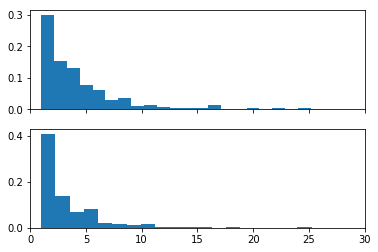

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True)

deg = np.array([nx.degree(g, i) for i in g.nodes()])
deg_true = np.array([nx.degree(g_true, i) for i in g_true.nodes()])

ax[0].hist(deg, 100, density=True)
ax[1].hist(deg_true, 40, density=True)

plt.xlim(0, 30)

In [23]:
len(deg[np.where(deg == 1)])

352

In [24]:
len(deg_true[np.where(deg_true == 1)])

689

(0, 15)

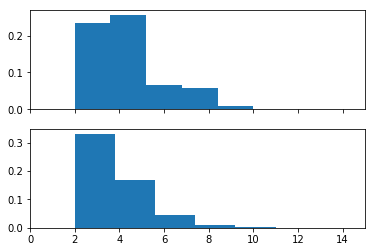

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True)

clique = np.array([nx.node_clique_number(g, i) for i in g.nodes()])
clique_true = np.array([nx.node_clique_number(g_true, i) for i in g_true.nodes()])

ax[0].hist(clique, 5, density=True)
ax[1].hist(clique_true, 5, density=True)

plt.xlim(0, 15)

(0, 5)

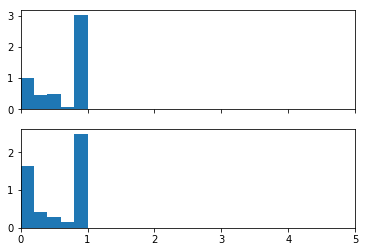

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True)

clustering = np.array([nx.clustering(g, i) for i in g.nodes()])
clustering_true = np.array([nx.clustering(g_true, i) for i in g_true.nodes()])

ax[0].hist(clustering, 5, density=True)
ax[1].hist(clustering_true, 5, density=True)

plt.xlim(0, 5)

Tests

In [ ]:
for i in range(25)
    Z = optim.sample_from_ibp(1572, alpha=2.78, sigma=0.575, c=250)
    net = Z.transpose() @ Z
    K, N = Z.shape
    links = []
    for i in range(N - 1):
        for j in range(i + 1, N):
            if net[i, j] >= 1:
                links.append([i, j])